In [98]:
'''Import required modules.'''
import pandas as pd        
import matplotlib.pyplot as plt            
from scipy import stats     

'''Function for displaying histogram of variable.'''
def histo(variable):
    gg = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.ylabel('Number')
    plt.title('Histogram of %s' %variable.name)
    
    for x in gg.patches:
        plt.annotate(x.get_height() , 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center',
         xytext = (0, 7), textcoords = 'offset points', fontsize = 13, color = 'black')
    display(gg)

In [99]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
result = pd.read_csv("gender_submission.csv")
'''Combine the test set and train set because some analysis require all the data '''
merged = pd.concat([train, test], sort = False)

display(merged)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Business Understanding  
The shipwreck of Titanic killed 1502 out of 2224 passengers and crew. The data was collected to analyse what sorts of people were likely to survive. Each record represent a passenger with his Ticket class, Name, Sex Gender, Age in years, # of siblings and spouses aboard the Titanic, # of parents and children aboard the Titanic, Ticket number, Passenger fare, Cabin number, Port of Embarkation.  

This data came from Kaggle. And the key was to find how the attribute affects the survival possibility or the relationship between them. Test set was given to predict if a passenger survived Titanic or not. And for each PassengerId in the test set, there is only 0 or 1 value for the Survived variable. The accuracy is the percentage of passengers correctly predicted.  

# Data Understanding  
## Meaning and Type  
Example:  
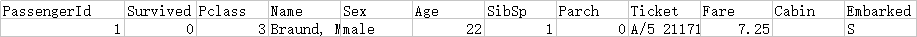  
  
PassengerId: Numerical data stands for each passenger, they are all integer  
Survived: binary Categorical data with 1 for survived, 0 for deceased  
Ticket class: Categorical data stands for ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd  
Sex: Categorical data with male and female  
Age: Numerical data stands for age  
SibSp: Categorical data stands for number of siblings and spouses aboard the Titanic  
Parch: Categorical data stands for number of parents and children aboard the Titanic  
Ticket: Categorical data stands for Ticket number  
Fare: Numerical data stands for ticket fare passenger paid for  
Cabin Number: Categorical data stands for cabin number  
Embarked: Categorical  stands for Port of Embarkation with 	C = Cherbourg, Q = Queenstown, S = Southampton  


## data quality

  
In column Age some values are empty, these are missing value. In column Fare some values are empty while the pclass is not, so these are missing value. For these two missing value just fill the empty value with average value  

Most value in column Cabin are empty, fill the empty with "X"

## basic statistics

In [100]:
sur = merged.Survived.describe()
pclass = merged.Pclass.describe()
age = merged.Age.describe()
fare = merged.Fare.describe()
sib = merged.SibSp.describe()

print (age)  


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


The mean of age is interesting because the average age of passenger is 29, which is a young age than expected.  
The mean of Sibsp is 0.5, which means everyone have 0.5 siblings and spouses on average.  

## Visualize the most important or interesting attributes
### age

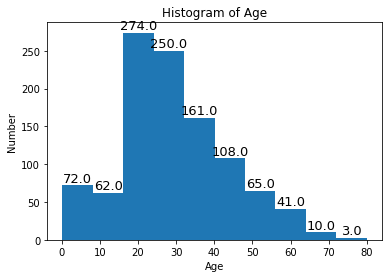

In [101]:
histo(merged.Age)

One thing interesting about histogram of age is that the age are quite concentrated on 20 to 40. Passengers with age 70-80 are least.
### Fare

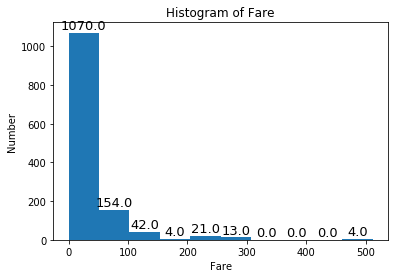

In [102]:
histo(merged.Fare)

It's easily seen that there is a outlier of about 500 Fare in this histogram. And most of the fare are concentrated on 0 to 50.

### SibSp

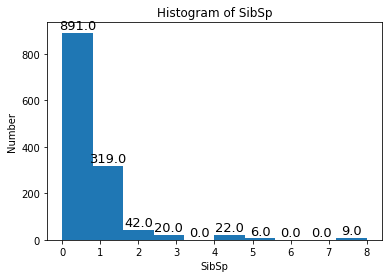

In [103]:
histo(merged.SibSp)

891 passengers have 0 sibling or spouse. 319 passengers have 1 sibling or spouse. While 9 passengers have 8 sibling or spouse on board.
### Pclass

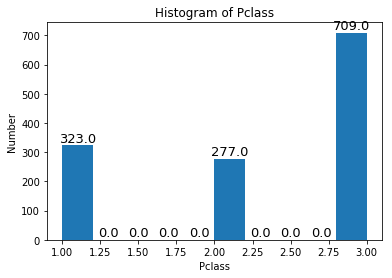

In [104]:
histo(merged.Pclass)

Distribution of Pclass is imbalanced. Class 3 appears most (709) while Class 2 appears least (277)
### Parch

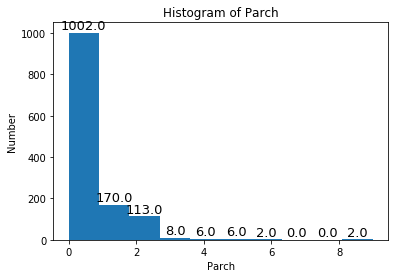

In [105]:
histo(merged.Parch)

About 1002 passengers have 0 parent or children. 170 have 1 and 113 have 2. The others are relatively small. 
## Visualize the most important or interesting attributes
# relationship between Fare & Survived 

In [106]:
train.drop(labels='Survived', axis=1).corrwith(merged['Survived'])

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

Above is a overview of correlation between Survived and other attribute

In [107]:
stats.pearsonr(train.Survived , train.Fare)

(0.25730652238496243, 6.120189341921873e-15)

The correlation between Survive and Fare is strong from the correlation value of 0.257307 and the p value (less than 0.01) which implies that  this correlation is statistically significant. And because the correlation value is positive, the more fare a passenger pay, the more possibility he is gonna survive
## Identify and explain any interesting relationships between the class attribute and the other attributes
# relationship between sex & Survived 

In [108]:
print (pd.crosstab(train.Sex, train.Survived))  
  
print (round(pd.crosstab(index = train.Sex, columns = train.Survived, normalize = 'index')*100, 2))

Survived    0    1
Sex               
female     81  233
male      468  109
Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


Above shows that female survivors are double male survivors. And the possibility female survive is 74.2% while male is 18.89%. So female are much likely to survive in Titanic.  
## Other attributes that can add
Attributes like citizenship, race, homeland, by altering the data collection process. Citizenship or homeland should be easy to collet.  


# Individual and Exceptional Work
About missing value
If we just fill missing value with mean or median, it will creat bias because this attribute is correlated with other attributes. We can fill missing value with median value of other data with same correlated attribute values.

In [109]:
merged.drop(labels='Age', axis=1).corrwith(merged['Age'])

PassengerId    0.028814
Survived      -0.077221
Pclass        -0.408106
SibSp         -0.243699
Parch         -0.150917
Fare           0.178740
dtype: float64

So Pclass is most correlated with age. There is doubt how many correlated attribute we can use. So just compare 1 and 2.

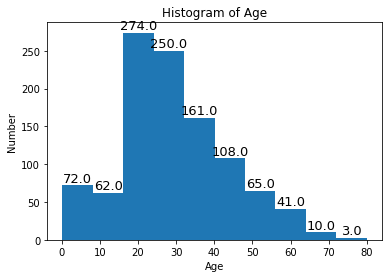

In [110]:
histo(merged.Age)
AGE1 = merged.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
AGE2 = merged.groupby(['Pclass','SibSp'])['Age'].transform(lambda x: x.fillna(x.median()))

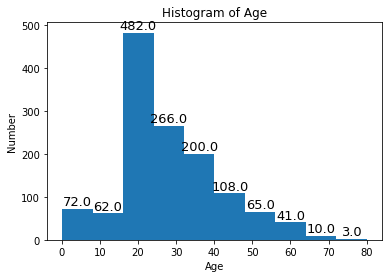

In [111]:
histo(AGE1)

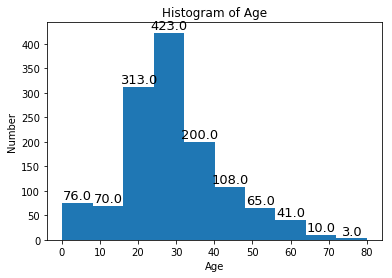

In [112]:
histo(AGE2)

We can see age1 and age2 are quite different. And to some extent age2 cause less bias than age1. So maybe we should use more correlate attribute concerning about filling missing values.